In [1]:
from IPython.display import Audio
import glob
import librosa
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
# from tf.keras.utils import Sequence

In [2]:
audio_files_path = "C:/Users/kolaw/Downloads/piano_dataset/audio_files"

In [3]:
audio_files = glob.glob(f"{audio_files_path}/*/*.wav") 

In [4]:
print(len(audio_files))

38082


In [5]:
sample_file = random.choice(audio_files)
print(sample_file)
audio, sr = librosa.load(sample_file)
Audio(audio,rate=sr)

C:/Users/kolaw/Downloads/piano_dataset/audio_files\YAMAHA DX7Piano\minor_7th#Gs4_B4_Ds5_Fs5#vol80aug.wav


In [6]:
os.path.basename(sample_file)

'minor_7th#Gs4_B4_Ds5_Fs5#vol80aug.wav'

In [7]:
KEY_RANGE_START = 21; KEY_RANGE_END = 108;
NOTE_NAMES_SHARP = ['C', 'Cs', 'D', 'Ds', 'E', 'F', 'Fs', 'G', 'Gs', 'A', 'As', 'B']
CHORD_STRUCTURES = {
    'major_triad': [0, 4, 7], 'minor_triad': [0, 3, 7],
    'diminished_triad': [0, 3, 6], 'augmented_triad': [0, 4, 8],
    'dominant_7th': [0, 4, 7, 10], 'major_7th': [0, 4, 7, 11],
    'minor_7th': [0, 3, 7, 10],
}
SAMPLE_RATE = 44100
codewd="C:/Users/kolaw/Downloads/piano_dataset/"

In [8]:
def parse_filename_to_note_number(filename):
    notes_numbers = []
    try:
        main_name = os.path.basename(filename)
        note_combinations = main_name.split("#")[1]
        
        all_notes = note_combinations.split("_")
    
        for mono_note in all_notes:
            
            octave = int(mono_note[-1])
            note_letter = mono_note[:-1]
            note_position = NOTE_NAMES_SHARP.index(note_letter)
            notes_numbers.append((octave+1)*12+note_position)
    except:
        print(f"WARNING: unable to proccess file - {filename}")
    return notes_numbers

In [9]:
parse_filename_to_note_number(sample_file)

[68, 71, 75, 78]

In [10]:
def note_midi_to_array_index(midi_number_array):
    return [midi_number - KEY_RANGE_START for midi_number in midi_number_array]

C:\Users\kolaw\AppData\Local\Temp\ipykernel_16480\4158445396.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(freq)


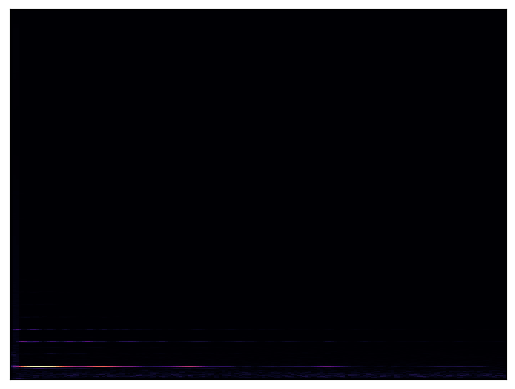

In [11]:
freq = librosa.stft(audio)
librosa.display.specshow(freq)
plt.show()

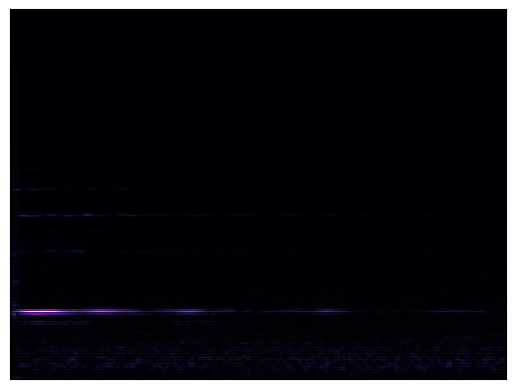

In [12]:
mag,_ = librosa.magphase(freq)
mel_scale_mag = librosa.feature.melspectrogram(S=mag, sr=SAMPLE_RATE,n_mels = 299)
librosa.display.specshow(mel_scale_mag)
plt.show()

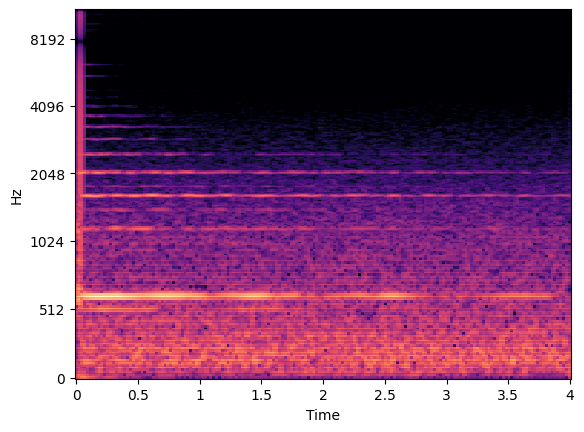

In [13]:
mel_sgram = librosa.amplitude_to_db(mel_scale_mag, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
plt.show()

In [14]:
def generate_mel_spectrogram(audio_file_path, chunk_size=41, hop_size=20):
    audio_to_convert,_= librosa.load(audio_file_path)
    audio_to_convert_freq = librosa.stft(audio_to_convert)
    audio_to_convert_mag,_ = librosa.magphase(audio_to_convert_freq)
    audio_to_convert_mel_scale_mag = librosa.feature.melspectrogram(S=audio_to_convert_mag, sr=SAMPLE_RATE,n_mels = 256)
    converted_mel_sgram = librosa.amplitude_to_db(audio_to_convert_mel_scale_mag, ref=np.min)

    if converted_mel_sgram.shape[1] < chunk_size:
        pad_width = chunk_size - converted_mel_sgram.shape[1]
        converted_mel_sgram = np.pad(converted_mel_sgram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    chunks = []
    num_chunks = converted_mel_sgram.shape[1] // hop_size

    for i in range(num_chunks):
        start = i * hop_size
        end = start + chunk_size
        if end > converted_mel_sgram.shape[1]:
            break
        chunk = converted_mel_sgram[:, start:end]
        chunks.append(chunk)
        
    return np.array(chunks)

In [15]:
dataset_path = os.path.join(f"{codewd}/final_dataset")
os.makedirs(dataset_path,exist_ok=True)
for index,audio_file in tqdm(enumerate(audio_files)):
    label = np.zeros(88)
    note_index = note_midi_to_array_index(parse_filename_to_note_number(audio_file))
    if note_index:
        for i in note_index:
            label[i] = 1
    if(index%1000 ==0):
        print(index)
    specs = generate_mel_spectrogram(audio_file)

    for i,spec_sample in enumerate(specs):
        np.savez(f'{dataset_path}/audio_sample{index}-{i}.npz', mel=spec_sample, label=label)
    
    # np.savez(f'{dataset_path}/audio_sample{index}.npz', mel=spec, label=label)

3it [00:00, 28.69it/s]

0


1005it [00:35, 30.59it/s]

1000


2003it [01:11, 27.46it/s]

2000


3004it [01:47, 19.44it/s]

3000


4006it [02:24, 31.19it/s]

4000


4227it [02:32, 26.58it/s]

4230it [02:32, 26.18it/s]

4236it [02:33, 17.95it/s]

4242it [02:33, 21.35it/s]

4248it [02:33, 23.43it/s]

4254it [02:34, 21.96it/s]

4257it [02:34, 22.94it/s]

4260it [02:34, 21.89it/s]

4266it [02:34, 20.68it/s]

4272it [02:35, 21.18it/s]

4275it [02:35, 22.28it/s]

4281it [02:35, 22.09it/s]

4284it [02:35, 18.77it/s]

4289it [02:35, 18.88it/s]

5004it [03:04, 25.05it/s]

5000


6003it [03:39, 27.76it/s]

6000


7003it [04:14, 30.76it/s]

7000


8003it [04:49, 31.98it/s]

8000


9006it [05:23, 28.55it/s]

9000


10005it [05:57, 31.18it/s]

10000


11006it [06:30, 33.18it/s]

11000


12005it [07:06, 25.61it/s]

12000


13004it [07:39, 28.86it/s]

13000


14003it [08:15, 30.94it/s]

14000


15004it [08:53, 29.14it/s]

15000


16004it [09:27, 27.56it/s]

16000


17007it [10:02, 30.59it/s]

17000


18004it [10:37, 28.35it/s]

18000


19004it [11:11, 31.62it/s]

19000


20003it [11:47, 22.72it/s]

20000


21001it [12:26,  8.01it/s]

21000


22004it [13:05, 28.71it/s]

22000


23003it [13:40, 32.37it/s]

23000


24003it [14:23, 24.99it/s]

24000


25005it [15:13, 29.50it/s]

25000


26003it [15:46, 26.76it/s]

26000


27006it [16:19, 31.82it/s]

27000


28004it [16:54, 26.52it/s]

28000


29003it [17:29, 24.81it/s]

29000


30003it [18:04, 26.55it/s]

30000


31004it [18:48, 28.43it/s]

31000


32002it [19:21, 32.40it/s]

32000


33004it [19:55, 30.52it/s]

33000


34005it [20:30, 30.05it/s]

34000


35005it [21:21, 32.90it/s]

35000


36003it [21:55, 34.72it/s]

36000


37006it [22:27, 33.86it/s]

37000


38002it [23:13, 31.25it/s]

38000


38082it [23:15, 27.29it/s]
